In [1]:
pip install scikit-surprise


     |████████████████████████████████| 6.5MB 2.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.0-cp36-cp36m-linux_x86_64.whl size=1678144 sha256=163da636b12bb23d1c781475ee6450e330fd39ff34c5aeebad6382bac7f980f1
  Stored in directory: /root/.cache/pip/wheels/cc/fa/8c/16c93fccce688ae1bde7d979ff102f7bee980d9cfeb8641bcf
Successfully built scikit-surprise


In [0]:
from surprise import SVD
from surprise import NMF
from surprise import Dataset
from surprise.model_selection import cross_validate, KFold
import os
from surprise import Reader
from surprise import KNNBasic
from surprise import accuracy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
%matplotlib inline

In [0]:

path_file = os.path.expanduser('restaurant_ratings.txt')
reader = Reader(line_format='user item rating timestamp', sep='\t')

In [4]:
#Q5 3-folds cross validation
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=SVD()
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9479  0.9474  0.9394  0.9449  0.0039  
MAE (testset)     0.7475  0.7485  0.7425  0.7461  0.0026  
Fit time          3.92    3.98    3.94    3.95    0.03    
Test time         0.26    0.31    0.31    0.29    0.02    


{'fit_time': (3.915696859359741, 3.9789493083953857, 3.9433820247650146),
 'test_mae': array([0.74745086, 0.74848186, 0.74248623]),
 'test_rmse': array([0.94786997, 0.94736402, 0.93941933]),
 'test_time': (0.26278138160705566, 0.30578112602233887, 0.3137798309326172)}

In [5]:
#Q6 PMF 3-folds cross validation
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=SVD(biased= False)
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9670  0.9656  0.9710  0.9679  0.0023  
MAE (testset)     0.7631  0.7619  0.7647  0.7632  0.0011  
Fit time          3.95    4.00    3.96    3.97    0.02    
Test time         0.20    0.20    0.27    0.23    0.03    


{'fit_time': (3.9489200115203857, 3.9995810985565186, 3.9577324390411377),
 'test_mae': array([0.76310829, 0.76191205, 0.76469381]),
 'test_rmse': array([0.96698716, 0.9656447 , 0.97101578]),
 'test_time': (0.20137286186218262, 0.2025289535522461, 0.27340269088745117)}

In [6]:
#Q7 NMF 3-folds cross validation
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=NMF()
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9860  0.9734  0.9733  0.9775  0.0060  
MAE (testset)     0.7765  0.7635  0.7637  0.7679  0.0061  
Fit time          4.31    4.31    4.33    4.32    0.01    
Test time         0.31    0.27    0.19    0.26    0.05    


{'fit_time': (4.306068420410156, 4.313411474227905, 4.3323822021484375),
 'test_mae': array([0.77650867, 0.76345838, 0.76366072]),
 'test_rmse': array([0.98599101, 0.9733512 , 0.97325523]),
 'test_time': (0.3051483631134033, 0.26925063133239746, 0.19254660606384277)}

In [7]:
#Q8 User based collaborative filtering
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=KNNBasic(sim_options = {
        'user_based': True 
        })
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9884  0.9913  0.9859  0.9885  0.0022  
MAE (testset)     0.7830  0.7814  0.7793  0.7813  0.0015  
Fit time          0.21    0.24    0.27    0.24    0.02    
Test time         4.92    5.03    5.09    5.02    0.07    


{'fit_time': (0.21152210235595703, 0.2420518398284912, 0.266742467880249),
 'test_mae': array([0.7830423 , 0.78140361, 0.77931016]),
 'test_rmse': array([0.98839386, 0.99126937, 0.98593106]),
 'test_time': (4.924901485443115, 5.030797243118286, 5.09453821182251)}

In [8]:
#Q9 Item based collaborative filtering
data=Dataset.load_from_file(path_file, reader=reader)
algorithm=KNNBasic(sim_options = {
        'user_based': False 
        })
cross_validate(algorithm, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9874  0.9828  0.9873  0.9858  0.0022  
MAE (testset)     0.7845  0.7761  0.7807  0.7804  0.0035  
Fit time          0.38    0.39    0.40    0.39    0.01    
Test time         5.59    5.73    5.83    5.72    0.10    


{'fit_time': (0.3816342353820801, 0.394850492477417, 0.40098142623901367),
 'test_mae': array([0.78451817, 0.77605904, 0.78072066]),
 'test_rmse': array([0.98742819, 0.98276563, 0.98732404]),
 'test_time': (5.591159343719482, 5.731678247451782, 5.8287413120269775)}

In [0]:
#Q10-Q12 Using same data for all algorithms
data=Dataset.load_from_file(path_file, reader=reader)
kf=KFold(n_splits=3)

In [10]:
#SVD
algorithm=SVD()
print("Evaluating RMSE and MAE for SVD")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)

print("==============")

#PMF

algorithm=SVD(biased=False)
print("Evaluating RMSE and MAE for PMF")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)
print("==============")

#NMF
algorithm=NMF()
print("Evaluating RMSE and MAE for NMF")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)
print("==============")

#User based collaborative filtering
algorithm=KNNBasic(sim_options={'user_based':True})
print("Evaluating RMSE and MAE for User based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)
print("==============")

#Item based collaborative filtering
algorithm=KNNBasic(sim_options={'user_based':False})
print("Evaluating RMSE and MAE for Item based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions, verbose=True)
    accuracy.mae(predictions, verbose=True)
print("==============")

Evaluating RMSE and MAE for SVD
------------
RMSE: 0.9419
MAE:  0.7428
------------
RMSE: 0.9477
MAE:  0.7471
------------
RMSE: 0.9437
MAE:  0.7450
Evaluating RMSE and MAE for PMF
------------
RMSE: 0.9620
MAE:  0.7596
------------
RMSE: 0.9672
MAE:  0.7612
------------
RMSE: 0.9657
MAE:  0.7611
Evaluating RMSE and MAE for NMF
------------
RMSE: 0.9864
MAE:  0.7753
------------
RMSE: 0.9723
MAE:  0.7631
------------
RMSE: 0.9724
MAE:  0.7626
Evaluating RMSE and MAE for User based collaborative filtering
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9878
MAE:  0.7805
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9903
MAE:  0.7817
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9889
MAE:  0.7825
Evaluating RMSE and MAE for Item based collaborative filtering
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE:

In [11]:
#Q14 Impact of cosine, pearson, MSD

#Item based collaborative filtering, cosine
algorithm=KNNBasic(sim_options={'name':'cosine','user_based':False})
print("Evaluating RMSE and MAE for Item based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions_cosine = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions_cosine, verbose=True)
    accuracy.mae(predictions_cosine, verbose=True)
print("==============")

#Item based collaborative filtering, MSD
algorithm=KNNBasic(sim_options={'name':'MSD','user_based':False})
print("Evaluating RMSE and MAE for Item based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions_msd = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions_msd, verbose=True)
    accuracy.mae(predictions_msd, verbose=True)
print("==============")

#Item based collaborative filtering, pearson
algorithm=KNNBasic(sim_options={'name':'pearson','user_based':False})
print("Evaluating RMSE and MAE for Item based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    predictions_pearson = algorithm.test(testset)
    print("------------")
    accuracy.rmse(predictions_pearson, verbose=True)
    accuracy.mae(predictions_pearson, verbose=True)
print("==============")

Evaluating RMSE and MAE for Item based collaborative filtering
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0263
MAE:  0.8145
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0416
MAE:  0.8267
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0398
MAE:  0.8259
Evaluating RMSE and MAE for Item based collaborative filtering
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9880
MAE:  0.7842
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9882
MAE:  0.7815
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9802
MAE:  0.7762
Evaluating RMSE and MAE for Item based collaborative filtering
Computing the pearson similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0480
MAE:  0.8394
Computing the 

MAE:  0.8409
MAE:  0.7762
MAE:  0.8259
[0.8408815085332705, 0.7762256460011001, 0.8259223917607668]


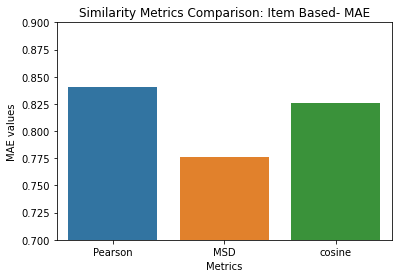

In [12]:
#Q14
vals = [np.mean(accuracy.mae(predictions_pearson, verbose=True)), np.mean(accuracy.mae(predictions_msd, verbose=True)), np.mean(accuracy.mae(predictions_cosine, verbose=True))]
metrics = np.array(['Pearson', 'MSD', 'cosine'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- MAE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.7, 0.9)
print(vals)

RMSE: 1.0476
RMSE: 0.9802
RMSE: 1.0398
[1.0475690396622797, 0.9801555883472307, 1.0397812271558222]


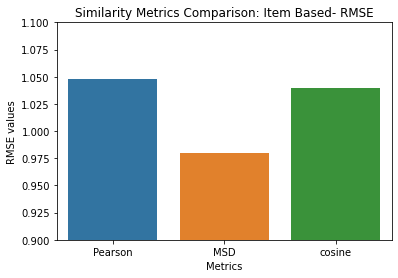

In [13]:
#Q14
vals = [np.mean(accuracy.rmse(predictions_pearson, verbose=True)), np.mean(accuracy.rmse(predictions_msd, verbose=True)), np.mean(accuracy.rmse(predictions_cosine, verbose=True))]
metrics = np.array(['Pearson', 'MSD', 'cosine'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- RMSE")
ax.set_ylabel('RMSE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.9, 1.1)
print(vals)


In [14]:
#Q14
#User based collaborative filtering, cosine
algorithm=KNNBasic(sim_options={'name':'cosine','user_based':True})
print("Evaluating RMSE and MAE for User based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    user_predictions_cosine = algorithm.test(testset)
    print("------------")
    accuracy.rmse(user_predictions_cosine, verbose=True)
    accuracy.mae(user_predictions_cosine, verbose=True)
print("==============")

#User based collaborative filtering, MSD
algorithm=KNNBasic(sim_options={'name':'MSD','user_based':True})
print("Evaluating RMSE and MAE for User based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    user_predictions_msd = algorithm.test(testset)
    print("------------")
    accuracy.rmse(user_predictions_msd, verbose=True)
    accuracy.mae(user_predictions_msd, verbose=True)
print("==============")

#User based collaborative filtering, pearson
algorithm=KNNBasic(sim_options={'name':'pearson','user_based':True})
print("Evaluating RMSE and MAE for User based collaborative filtering")
for trainset, testset in kf.split(data):

    algorithm.fit(trainset)
    user_predictions_pearson = algorithm.test(testset)
    print("------------")
    accuracy.rmse(user_predictions_pearson, verbose=True)
    accuracy.mae(user_predictions_pearson, verbose=True)
print("==============")

Evaluating RMSE and MAE for User based collaborative filtering
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0200
MAE:  0.8072
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0204
MAE:  0.8081
Computing the cosine similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0261
MAE:  0.8141
Evaluating RMSE and MAE for User based collaborative filtering
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9889
MAE:  0.7818
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9873
MAE:  0.7805
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9903
MAE:  0.7826
Evaluating RMSE and MAE for User based collaborative filtering
Computing the pearson similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.0215
MAE:  0.8107
Computing the 

MAE:  0.8035
MAE:  0.7826
MAE:  0.8141
[0.8035325799222353, 0.7825931452953921, 0.8141153985835008]


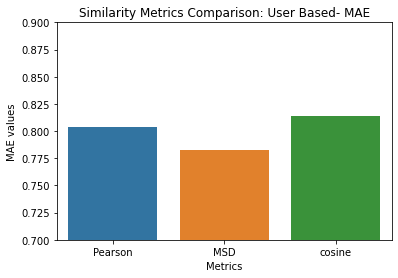

In [15]:
#Q14
vals = [np.mean(accuracy.mae(user_predictions_pearson, verbose=True)), np.mean(accuracy.mae(user_predictions_msd, verbose=True)), np.mean(accuracy.mae(user_predictions_cosine, verbose=True))]
metrics = np.array(['Pearson', 'MSD', 'cosine'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: User Based- MAE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.7, 0.9)
print(vals)

RMSE: 1.0112
RMSE: 0.9903
RMSE: 1.0261
[1.0112162781718637, 0.9903249770375607, 1.0260723022607805]


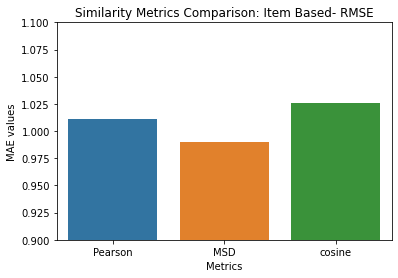

In [16]:
#Q14
vals = [np.mean(accuracy.rmse(user_predictions_pearson, verbose=True)), np.mean(accuracy.rmse(user_predictions_msd, verbose=True)), np.mean(accuracy.rmse(user_predictions_cosine, verbose=True))]
metrics = np.array(['Pearson', 'MSD', 'cosine'])
series = pd.Series(name='MAE', data=vals)
ax = sns.barplot(metrics, series.values)
ax.set_title("Similarity Metrics Comparison: Item Based- RMSE")
ax.set_ylabel('MAE values')
ax.set_xlabel('Metrics')
ax.set_ylim(.9, 1.1)
print(vals)


In [0]:
#Question 15 
#Finding best K for User Based collaborative filtering
user_Based_RMSE_of_different_k = []
user_Based_MAE_of_different_k = []
for i in range(1,20):
    algorithm = KNNBasic(k=i, sim_options = {
            'name': 'MSD',
            'user_based': True 
            })
    print("Evaluating RMSE and MAE for User based collaborative filtering")
    print("________________________________")
    print("K= ", i)
    for trainset, testset in kf.split(data):

        algorithm.fit(trainset)
        predictions = algorithm.test(testset)
        print("------------")
        accuracy.rmse(predictions, verbose=True)
        accuracy.mae(predictions, verbose=True)
    print("==============")
    user_Based_MAE_of_different_k.append(accuracy.mae(predictions, verbose=True))
    user_Based_RMSE_of_different_k.append(accuracy.rmse(predictions, verbose=True))

Evaluating RMSE and MAE for User based collaborative filtering
________________________________
K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.3272
MAE:  0.9799
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.3249
MAE:  0.9762
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.3343
MAE:  0.9853
MAE:  0.9853
RMSE: 1.3343
Evaluating RMSE and MAE for User based collaborative filtering
________________________________
K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.1576
MAE:  0.8937
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.1543
MAE:  0.8920
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 1.1460
MAE:  0.8849
MAE:  0.8849
RMSE: 1.1460
Evaluating RMSE and MAE for User based collaborative filtering
_________

In [0]:
#Question 15 
#Finding best K for Item Based collaborative filtering
item_Based_RMSE_of_different_k = []
item_Based_MAE_of_different_k = []
for i in range(1,20):
    algorithm = KNNBasic( sim_options = {
            'name': 'MSD',
            'user_based': False 
            })
    print("Evaluating RMSE and MAE for Item based collaborative filtering")
    print("________________________________")
    print("K= ", i)
    for trainset, testset in kf.split(data):

        algorithm.fit(trainset)
        predictions = algorithm.test(testset)
        print("------------")
        accuracy.rmse(predictions, verbose=True)
        accuracy.mae(predictions, verbose=True)
    print("==============")
    item_Based_MAE_of_different_k.append(accuracy.mae(predictions, verbose=True))
    item_Based_RMSE_of_different_k.append(accuracy.rmse(predictions, verbose=True))

Evaluating RMSE and MAE for Item based collaborative filtering
________________________________
K=  1
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9874
MAE:  0.7824
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9810
MAE:  0.7765
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9855
MAE:  0.7810
MAE:  0.7810
RMSE: 0.9855
Evaluating RMSE and MAE for Item based collaborative filtering
________________________________
K=  2
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9864
MAE:  0.7798
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9827
MAE:  0.7805
Computing the msd similarity matrix...
Done computing similarity matrix.
------------
RMSE: 0.9900
MAE:  0.7825
MAE:  0.7825
RMSE: 0.9900
Evaluating RMSE and MAE for Item based collaborative filtering
_________

In [0]:
min_RMSE_index = np.argmin(user_Based_RMSE_of_different_k)
print("Best K= ", min_RMSE_index)
print("Best RMSE= ", np.min(user_Based_RMSE_of_different_k))

Best K=  17
Best RMSE=  0.9830461021595481


(0.7, 1.2)

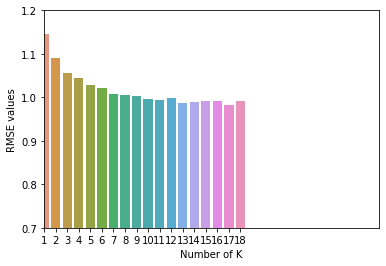

In [0]:
series = pd.Series(name='rmse', data=user_Based_RMSE_of_different_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('RMSE values')
ax.set_xlabel('Number of K')
ax.set_xlim(1, 30)
ax.set_ylim(.7, 1.2)

In [0]:
min_RMSE_index = np.argmin(item_Based_RMSE_of_different_k)
print("Best K= ", min_RMSE_index)
print("Best RMSE= ", np.min(item_Based_RMSE_of_different_k))

Best K=  5
Best RMSE=  0.9787998787622499


(0.8, 1.2)

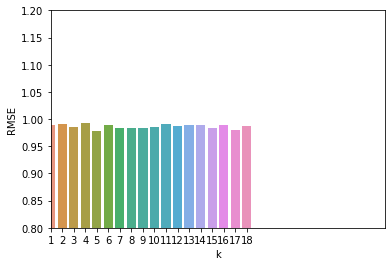

In [0]:
series = pd.Series(name='rmse', data=item_Based_RMSE_of_different_k)
ax = sns.barplot(series.index, series.values)
ax.set_ylabel('RMSE')
ax.set_xlabel('k')
ax.set_xlim(1, 30)
ax.set_ylim(.8, 1.2)